<a href="https://colab.research.google.com/github/elgomez7/MPM_200_Gomez/blob/main/MPM200_Session5_HW_JesusGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [ ]:
install.packages('beepr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [ ]:
library (beepr)

In [ ]:
beep('mario')

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('sjPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
humm  = read.csv("/content/Hummingbird_data.csv")

In [ ]:
colnames(humm)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [ ]:
dim(humm)

[1] 6908   12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [ ]:
str(humm)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [ ]:
# Identify data types of each column
data_types = sapply(humm, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [ ]:
library(dplyr)
model_data = sample_n(data, 5000)

In [ ]:
dim(model_data)

[1] 5000   12

In [ ]:
data_types = sapply(model_data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

There are 5000 rows and just 12 columns in the data frame.

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

11 columns are categorical variables while just 1 is a continuous variable.

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [ ]:
write.csv(model_data, "/content/Hummingbird_data_JesusGomez.csv")

In [ ]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [ ]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4157
Santa Barbara,59
malibu,784


In [ ]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [ ]:
library(ggplot2)

In [ ]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="Identity", color = 'black', fill = 'pink')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

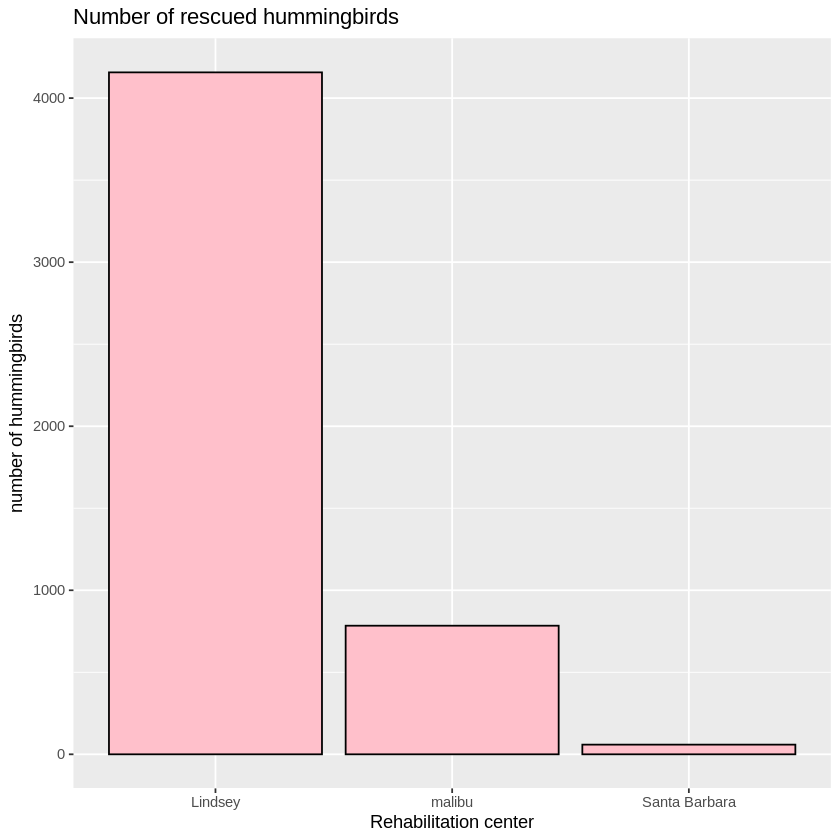

In [ ]:
p

In [ ]:
ggsave("rehabilitation_center.pdf", width = 4, height = 3)

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

The plot was saved into a pdf

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

What rehab = model_data does is creates a new storage object called rehab. Then group_by(place) organizes the data by groups. Summarise counts the unique IDs and stores them in a new data called "count". Library will run the function ggplot. ggplot will set the x and y axys. Geom_bar will be the bar chart, putting the variable to measure and the look of the chart. xlab and ylab are the labels and lab is the name of the plot.
p will generate the plot and gg save will export as a PDF.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [ ]:
covariate_1 = model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


In [ ]:
print(covariate_1)

# A tibble: 6 × 3
# Groups:   Sex_e [3]
  Sex_e          Disposition_binary count
  <chr>          <chr>              <int>
1 "Female-like " Died                2334
2 "Female-like " Released             922
3 "Male"         Died                 454
4 "Male"         Released             118
5 "unknown"      Died                 417
6 "unknown"      Released             755


In [ ]:
p = ggplot(covariate_1, aes(x = Sex_e, y = count, fill = Disposition_binary)) +
geom_bar(stat="Identity", color ='black')+
facet_grid(~Disposition_binary)
labs(title = "Survival by sex")

<ggplot2::labels> List of 1
 $ title: chr "Survival by sex"

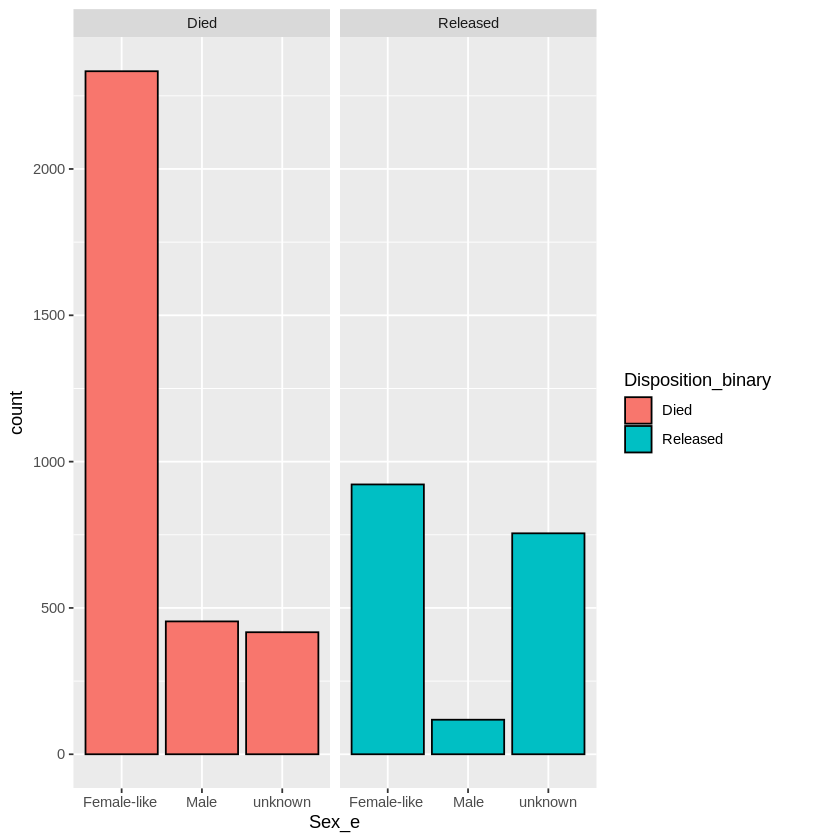

In [ ]:
p

In [ ]:
covariate_2 = model_data %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [ ]:
print(covariate_2)

# A tibble: 4 × 3
# Groups:   Age_e [2]
  Age_e      Disposition_binary count
  <chr>      <chr>              <int>
1 Nestling   Died                 408
2 Nestling   Released             755
3 adult-like Died                2797
4 adult-like Released            1040


In [ ]:
p = ggplot(covariate_2, aes(x = Age_e, y = count, fill = Disposition_binary)) +
geom_bar(stat="Identity", color ='black')+
facet_grid(~Disposition_binary)
labs(title = "Survival by age")

<ggplot2::labels> List of 1
 $ title: chr "Survival by age"

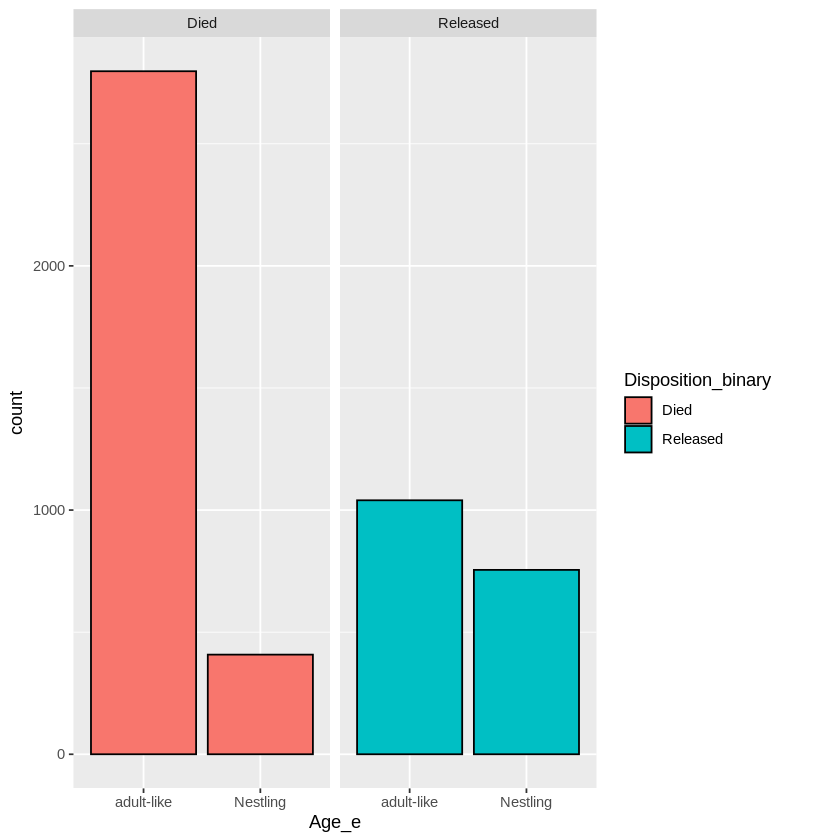

In [ ]:
p

In [ ]:
covariate_3 = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [ ]:
print(covariate_3)

# A tibble: 8 × 3
# Groups:   season [4]
  season Disposition_binary count
  <chr>  <chr>              <int>
1 Fall   Died                 371
2 Fall   Released              65
3 Spring Died                1331
4 Spring Released             944
5 Summer Died                 954
6 Summer Released             605
7 Winter Died                 549
8 Winter Released             181


In [ ]:
p = ggplot(covariate_3, aes(x = season, y = count, fill = Disposition_binary)) +
geom_bar(stat="Identity", color ='black')+
facet_grid(~Disposition_binary)
labs(title = "Survival by season")

<ggplot2::labels> List of 1
 $ title: chr "Survival by season"

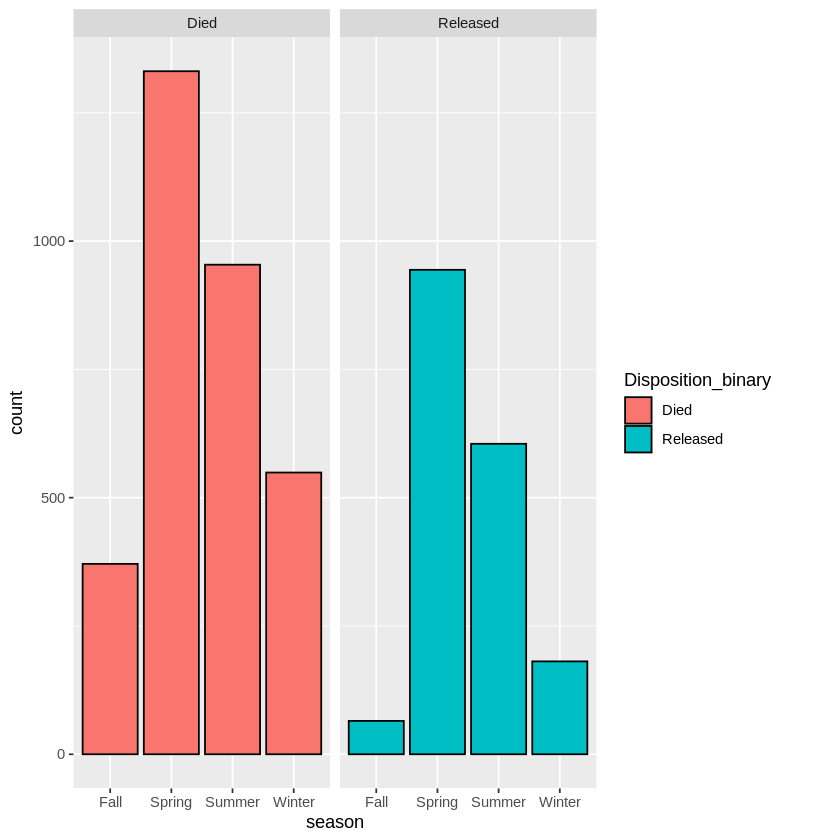

In [ ]:
p

In [ ]:
covariate_4 = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.


In [ ]:
print(covariate_4)

# A tibble: 4 × 3
# Groups:   F_Aid [2]
  F_Aid Disposition_binary count
  <chr> <chr>              <int>
1 No    Died                2099
2 No    Released            1176
3 Yes   Died                1106
4 Yes   Released             619


In [ ]:
p = ggplot(covariate_4, aes(x = F_Aid, y = count, fill = Disposition_binary)) +
geom_bar(stat="Identity", color ='black')+
facet_grid(~Disposition_binary)
labs(title = "Survival by Aid received")

<ggplot2::labels> List of 1
 $ title: chr "Survival by Aid received"

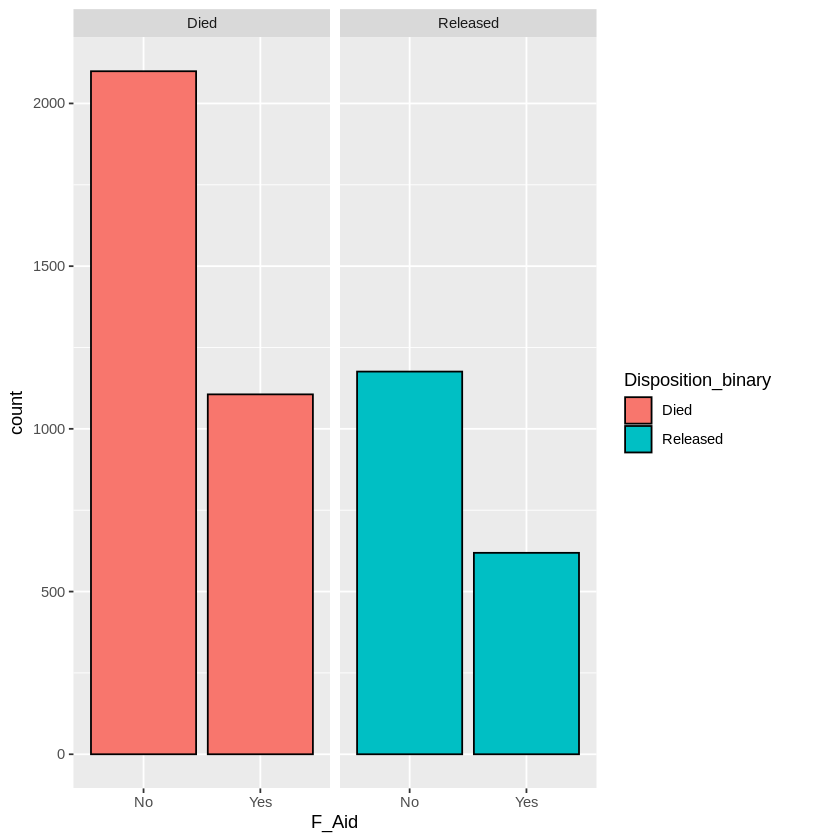

In [ ]:
p

In [ ]:
covariate_5 = model_data %>%
  group_by(r, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'r'. You can override using the `.groups`
argument.


In [ ]:
print(covariate_5)

# A tibble: 14 × 3
# Groups:   r [7]
   r                         Disposition_binary count
   <chr>                     <chr>              <int>
 1 caught by domestic animal Died                 460
 2 caught by domestic animal Released             176
 3 found inside              Died                 122
 4 found inside              Released              46
 5 found on the ground       Died                1428
 6 found on the ground       Released             737
 7 nest-related              Died                 259
 8 nest-related              Released             403
 9 suspect torpor-like state Died                  92
10 suspect torpor-like state Released               9
11 unknown                   Died                 482
12 unknown                   Released             318
13 window hit                Died                 362
14 window hit                Released             106


In [ ]:
p = ggplot(covariate_5, aes(x = r, y = count, fill = Disposition_binary)) +
geom_bar(stat="Identity", color ='black')+
facet_grid(~Disposition_binary)
labs(title = "Survival by place found")

<ggplot2::labels> List of 1
 $ title: chr "Survival by place found"

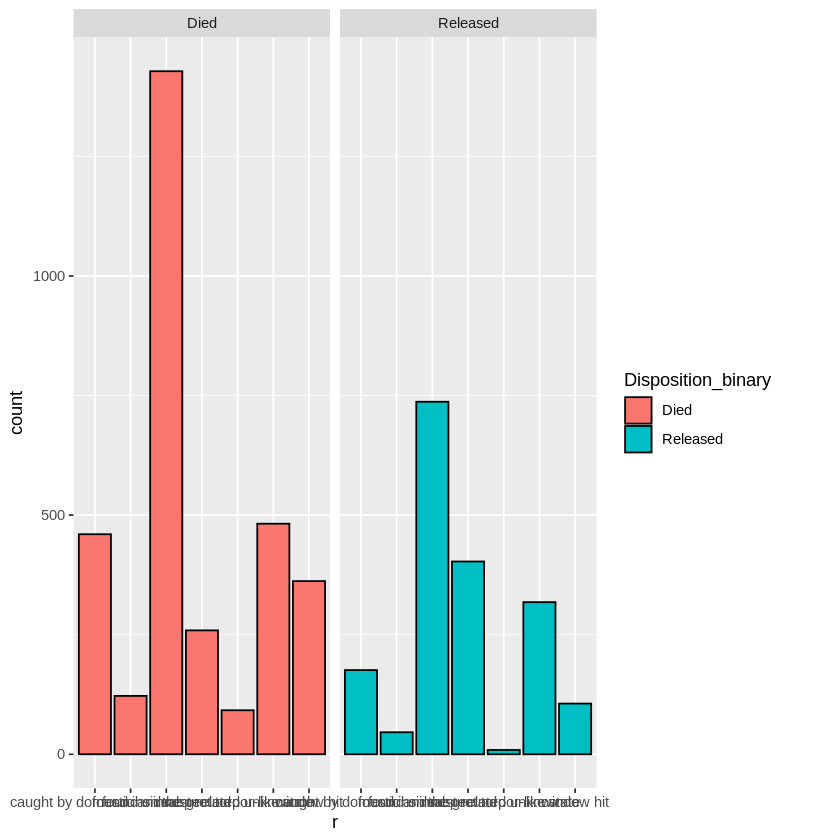

In [ ]:
p

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

Yes, all the covariates are associated with the survival status. It appears that in season, spring has increased number of deaths compared with other seasons, adult like birds have a higher death counts compared to younger, a lot of birds died due to not receive AID, and females seems to be more likely to die in comparison with males. The statistical test that would be recommended would be a Chi-squared test, since is designed to check 2 categorical variables.

In [ ]:
df = model_data  %>%
group_by(Age_e, Sex_e)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [ ]:
df

Age_e,Sex_e,count
<chr>,<chr>,<int>
Nestling,unknown,1163
adult-like,Female-like,3256
adult-like,Male,572
adult-like,unknown,9


In [ ]:
p + facet_grid(. ~ FACET_column)+ coord_flip()

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

In [ ]:
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


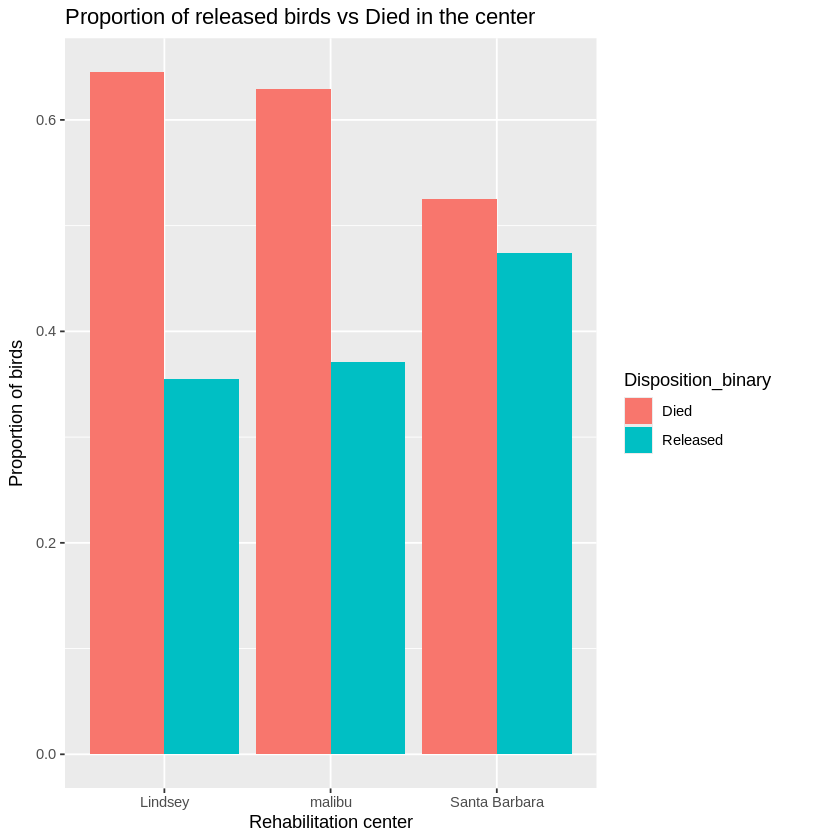

In [ ]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation center") +
  ylab("Proportion of birds") +
  labs(title = "Proportion of released birds vs Died in the center")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


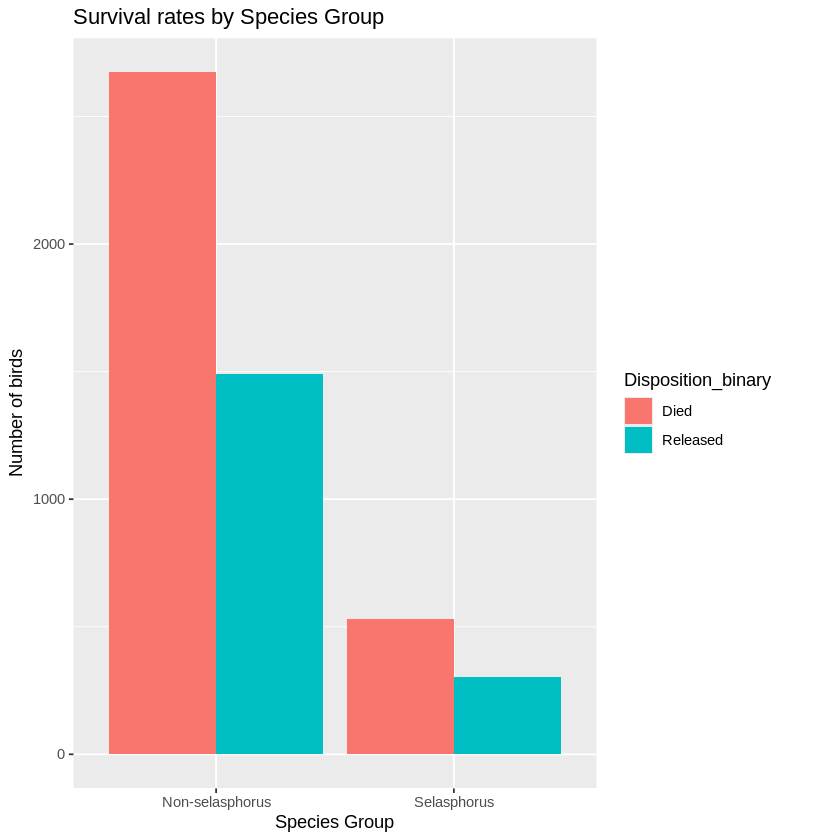

In [ ]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == "Selasphorus", "Selasphorus",
                                  "Non-selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of birds") +
  labs(title ="Survival rates by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [ ]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [ ]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", fill = "pink") +
  xlab("month") +
  ylab("number of admissions") +
  labs(title = "Hummingbird Admission by month")+
theme(axis.text = element_text(angle = 90, vjust = 0.5, hjust=1))

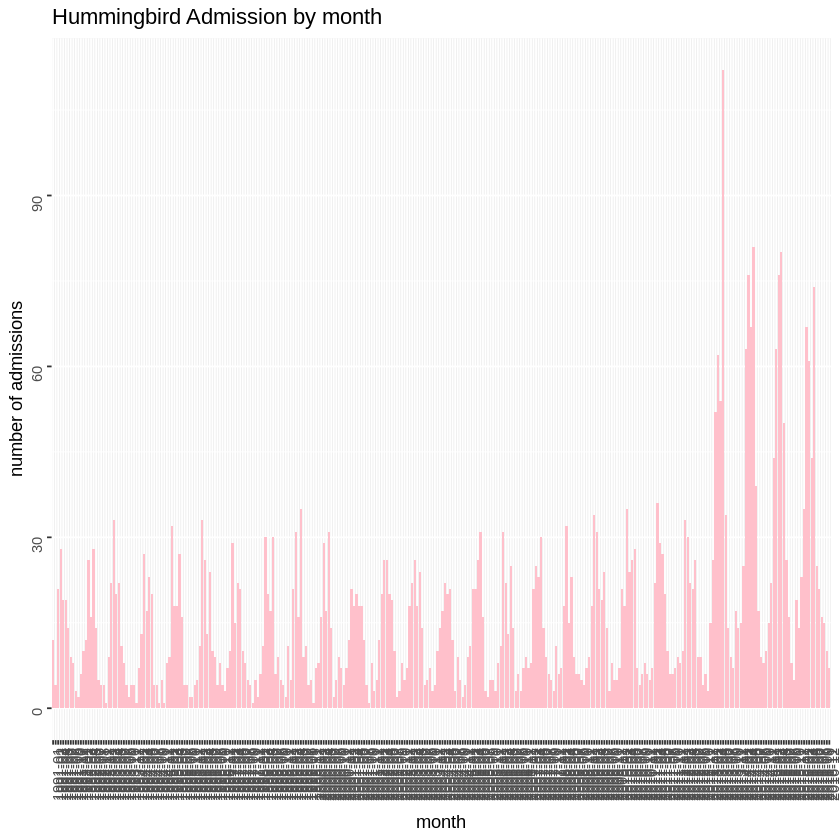

In [ ]:
p_month

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", fill = "pink") +
  xlab("year") +
  ylab("number of admissions") +
  labs(title = "Hummingbird Admission by year") +
theme(axis.text = element_text(angle = 90, vjust = 0.5, hjust=1))

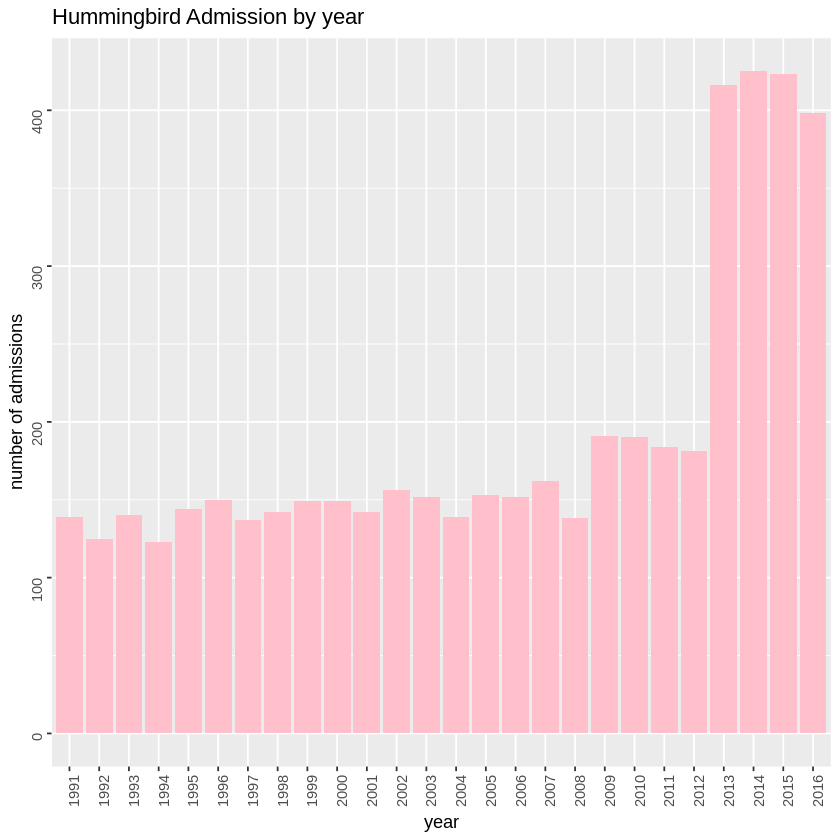

In [ ]:
p_year